<a href="https://colab.research.google.com/github/tasheera/CVD_Risk_Analyser/blob/MachineLearning/Copy_of_CardioVascularDieseaseRiskAssesssmentModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular disease risk assessment**

In [723]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler

# **Load dataset**

In [724]:
cvd_data = pd.read_csv('health_data.csv', index_col = 'id')
cvd_data

,age,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,1,168,62.0,110,80,0,0,0,0,1,0
1,20228,0,156,85.0,140,90,2,0,0,0,1,1
2,18857,0,165,64.0,130,70,2,0,0,0,0,1
3,17623,1,169,82.0,150,100,0,0,0,0,1,1
4,17474,0,156,56.0,100,60,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,1,168,76.0,120,80,0,0,1,0,1,0
99995,22601,0,158,126.0,140,90,1,1,0,0,1,1
99996,19066,1,183,105.0,180,90,2,0,0,1,0,1


In [725]:
cvd_data.describe()

,age,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,0.349571,164.359229,74.205690,128.817286,96.630414,0.366871,0.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


#**Data Preprocessing**



In [726]:
cvd_data.isnull().sum()


age             0
gender          0
height          0
weight          0
systolic_BP     0
diastolic_BP    0
cholesterol     0
gluc            0
smoke           0
alco            0
active          0
cardio          0
dtype: int64

In [727]:
cvd_data.duplicated().sum()

24

In [728]:
#age into years
cvd_data["age"]=(cvd_data["age"]/365).values.astype(int)
cvd_data.head()

,age,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,1,168,62.0,110,80,0,0,0,0,1,0
1,55,0,156,85.0,140,90,2,0,0,0,1,1
2,51,0,165,64.0,130,70,2,0,0,0,0,1
3,48,1,169,82.0,150,100,0,0,0,0,1,1
4,47,0,156,56.0,100,60,0,0,0,0,0,0


In [729]:
#height into meteres
cvd_data["height"]=(cvd_data["height"]/100)
cvd_data.head()

,age,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,1,1.68,62.0,110,80,0,0,0,0,1,0
1,55,0,1.56,85.0,140,90,2,0,0,0,1,1
2,51,0,1.65,64.0,130,70,2,0,0,0,0,1
3,48,1,1.69,82.0,150,100,0,0,0,0,1,1
4,47,0,1.56,56.0,100,60,0,0,0,0,0,0


In [730]:
#BMI
cvd_data["bmi"]=cvd_data["weight"]/((cvd_data["height"])*(cvd_data["height"]))
cvd_data.head()

,age,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,50,1,1.68,62.0,110,80,0,0,0,0,1,0,21.967120
1,55,0,1.56,85.0,140,90,2,0,0,0,1,1,34.927679
2,51,0,1.65,64.0,130,70,2,0,0,0,0,1,23.507805
3,48,1,1.69,82.0,150,100,0,0,0,0,1,1,28.710479
4,47,0,1.56,56.0,100,60,0,0,0,0,0,0,23.011177


**Histogram and bell curve**

In [731]:
bins_value = int(np.sqrt(len(cvd_data)))

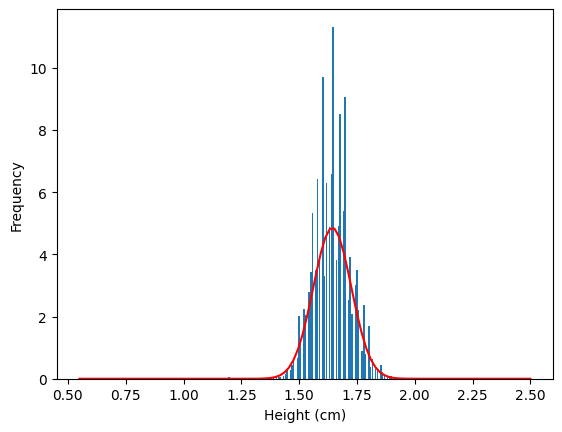

In [732]:
plt.hist(cvd_data.height, bins = bins_value, rwidth = 0.8,density=True)
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

x_range = np.linspace(cvd_data.height.min(), cvd_data.height.max(), 100)
plt.plot(x_range, norm.pdf(x_range, cvd_data.height.mean(), cvd_data.height.std()), label='Normal Distribution', color='red')
plt.show()

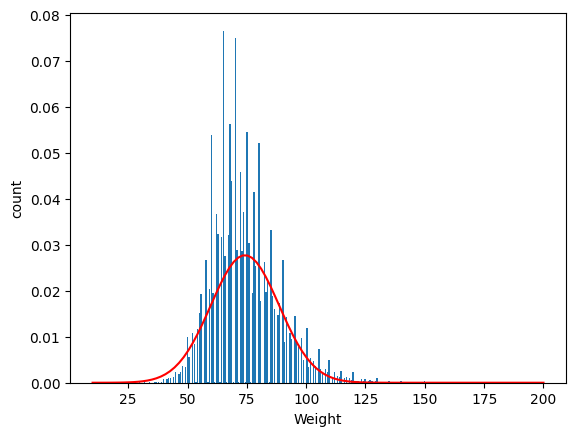

In [733]:
plt.hist(cvd_data.weight, bins = bins_value, rwidth = 0.8, density=True)
plt.xlabel('Weight')
plt.ylabel('count')

x_range = np.linspace(cvd_data.weight.min(), cvd_data.weight.max(), 100)
plt.plot(x_range, norm.pdf(x_range, cvd_data.weight.mean(), cvd_data.weight.std()), label='Normal Distribution', color='red')

plt.show()

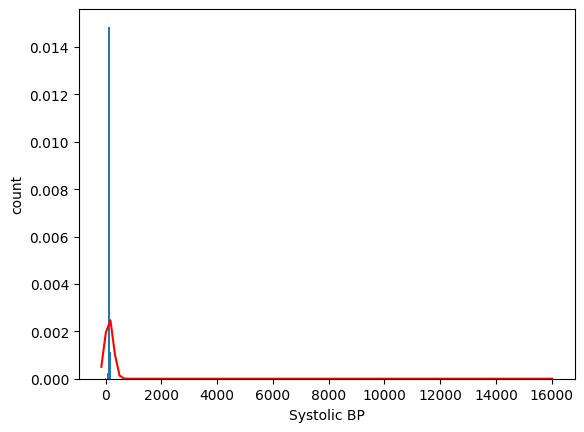

In [734]:
plt.hist(cvd_data.systolic_BP, bins = bins_value, rwidth = 0.8, density=True)
plt.xlabel('Systolic BP')
plt.ylabel('count')

x_range = np.linspace(cvd_data.systolic_BP.min(), cvd_data.systolic_BP.max(), 100)
plt.plot(x_range, norm.pdf(x_range, cvd_data.systolic_BP.mean(), cvd_data.systolic_BP.std()), label='Normal Distribution', color='red')

plt.show()

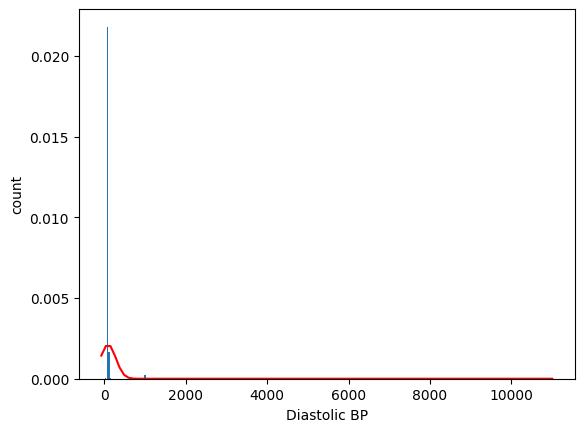

In [735]:
plt.hist(cvd_data.diastolic_BP, bins = bins_value, rwidth = 0.8, density=True)
plt.xlabel('Diastolic BP')
plt.ylabel('count')

x_range = np.linspace(cvd_data.diastolic_BP.min(), cvd_data.diastolic_BP.max(), 100)
plt.plot(x_range, norm.pdf(x_range, cvd_data.diastolic_BP.mean(), cvd_data.diastolic_BP.std()), label='Normal Distribution', color='red')

plt.show()

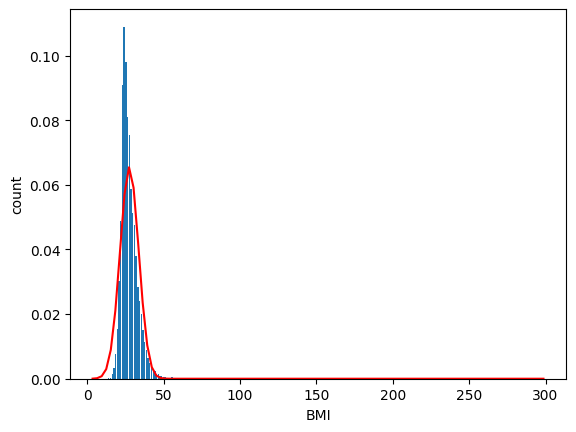

In [736]:
plt.hist(cvd_data.bmi, bins = bins_value, rwidth = 0.8, density=True)
plt.xlabel('BMI')
plt.ylabel('count')

x_range = np.linspace(cvd_data.bmi.min(), cvd_data.bmi.max(), 100)
plt.plot(x_range, norm.pdf(x_range, cvd_data.bmi.mean(), cvd_data.bmi.std()), label='Normal Distribution', color='red')

plt.show()

**Box Plot and outlierr removal**

<Axes: >

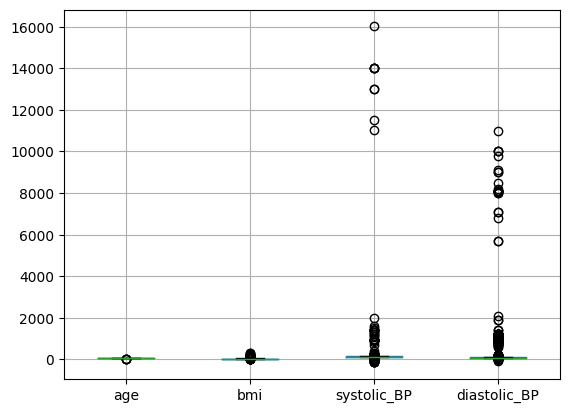

In [737]:
numeric_data = cvd_data[["age", "bmi", "systolic_BP","diastolic_BP"]]
numeric_data.boxplot()

In [738]:
Q1 = cvd_data.quantile(0.25)
Q3 = cvd_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
'''
((numeric_data<(lower_bound)) | (numeric_data>(upper_bound)))
out_row=((numeric_data<(lower_bound)) | (numeric_data>(upper_bound))).any(axis=1)
cvd_data=cvd_data[~out_row]
'''
# Remove outliers from the original dataset
cvd_data = cvd_data[
    (cvd_data['age'] >= lower_bound['age']) &
    (cvd_data['age'] <= upper_bound['age']) &
    (cvd_data['height'] >= lower_bound['height']) &
    (cvd_data['height'] <= upper_bound['height']) &
    (cvd_data['weight'] >= lower_bound['weight']) &
    (cvd_data['weight'] <= upper_bound['weight']) &
    (cvd_data['bmi'] >= lower_bound['bmi']) &
    (cvd_data['bmi'] <= upper_bound['bmi']) &
    (cvd_data['systolic_BP'] >= lower_bound['systolic_BP']) &
    (cvd_data['systolic_BP'] <= upper_bound['systolic_BP']) &
    (cvd_data['diastolic_BP'] >= lower_bound['diastolic_BP']) &
    (cvd_data['diastolic_BP'] <= upper_bound['diastolic_BP'])
]

<Axes: >

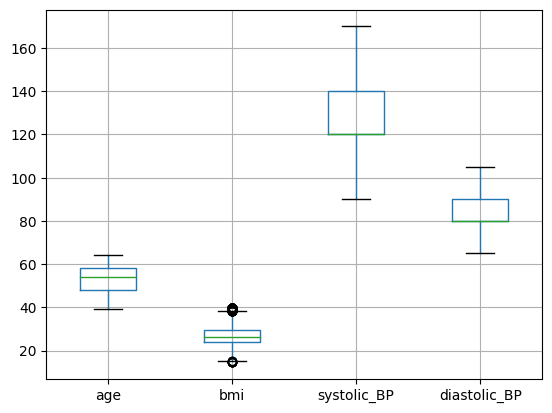

In [739]:
numeric_data = cvd_data[["age", "bmi", "systolic_BP","diastolic_BP"]]
numeric_data.boxplot()

In [740]:
cvd_data.shape

(61789, 13)

In [741]:
cvd_data["cardio"].value_counts()

0    31416
1    30373
Name: cardio, dtype: int64

In [742]:
cvd_data.corr()["cardio"]

age             0.236389
gender         -0.001506
height         -0.022198
weight          0.157002
systolic_BP     0.432416
diastolic_BP    0.335798
cholesterol     0.217433
gluc            0.085623
smoke          -0.021184
alco           -0.012249
active         -0.036491
cardio          1.000000
bmi             0.175919
Name: cardio, dtype: float64

<Axes: >

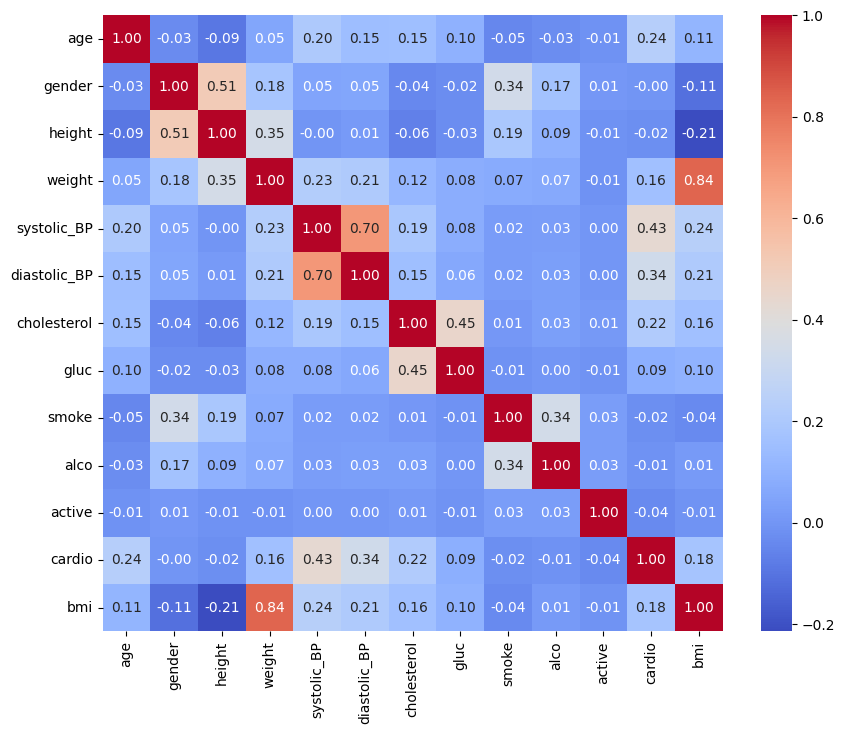

In [743]:
plt.figure(figsize=(10, 8))
sns.heatmap((cvd_data.corr()), annot=True, cmap='coolwarm', fmt=".2f")

In [744]:
labler =LabelEncoder()
cvd_data["gender"]=labler.fit_transform(cvd_data["gender"])
cvd_data.head()

<ipython-input-744-c2a5a2839823>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd_data["gender"]=labler.fit_transform(cvd_data["gender"])


,age,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,50,1,1.68,62.0,110,80,0,0,0,0,1,0,21.967120
1,55,0,1.56,85.0,140,90,2,0,0,0,1,1,34.927679
2,51,0,1.65,64.0,130,70,2,0,0,0,0,1,23.507805
3,48,1,1.69,82.0,150,100,0,0,0,0,1,1,28.710479
8,60,0,1.51,67.0,120,80,1,1,0,0,0,0,29.384676


In [745]:
cvd_data["cholesterol"].value_counts()

0    46801
1     8087
2     6901
Name: cholesterol, dtype: int64

In [746]:
cvd_data["gluc"].value_counts()

0    52854
2     4613
1     4322
Name: gluc, dtype: int64

In [747]:
categorical_columns = ["cholesterol",	"gluc"]
cvd_data = pd.get_dummies(cvd_data, columns=categorical_columns)

cvd_data.rename(columns={"cholesterol_0": 'cholesterol_Normal'}, inplace=True)
cvd_data.rename(columns={"cholesterol_1": 'cholesterol_Above_Normal'}, inplace=True)
cvd_data.rename(columns={"cholesterol_2": 'cholesterol_Well_Above_Normal'}, inplace=True)
cvd_data.rename(columns={"gluc_0": 'glucose_Normal'}, inplace=True)
cvd_data.rename(columns={"gluc_1": 'glucose_Above_Normal'}, inplace=True)
cvd_data.rename(columns={"gluc_2": 'glucose_Well_Above_Normal'}, inplace=True)

In [748]:
cvd_data.head()

,age,gender,height,weight,systolic_BP,diastolic_BP,smoke,alco,active,cardio,bmi,cholesterol_Normal,cholesterol_Above_Normal,cholesterol_Well_Above_Normal,glucose_Normal,glucose_Above_Normal,glucose_Well_Above_Normal
id,,,,,,,,,,,,,,,,,
0,50,1,1.68,62.0,110,80,0,0,1,0,21.967120,1,0,0,1,0,0
1,55,0,1.56,85.0,140,90,0,0,1,1,34.927679,0,0,1,1,0,0
2,51,0,1.65,64.0,130,70,0,0,0,1,23.507805,0,0,1,1,0,0
3,48,1,1.69,82.0,150,100,0,0,1,1,28.710479,1,0,0,1,0,0
8,60,0,1.51,67.0,120,80,0,0,0,0,29.384676,0,1,0,0,1,0


# **Data preperation**

## Data seperation as X and Y

In [749]:
print(cvd_data.columns)

Index(['age', 'gender', 'height', 'weight', 'systolic_BP', 'diastolic_BP',
       'smoke', 'alco', 'active', 'cardio', 'bmi', 'cholesterol_Normal',
       'cholesterol_Above_Normal', 'cholesterol_Well_Above_Normal',
       'glucose_Normal', 'glucose_Above_Normal', 'glucose_Well_Above_Normal'],
      dtype='object')


## Data splitting into testing and training

**Standardising values**

In [750]:
scaler = StandardScaler()

numeric_columns = ["age", "bmi", "systolic_BP", "diastolic_BP"]

cvd_data[numeric_columns] = scaler.fit_transform(cvd_data[numeric_columns])
cvd_data.head()

,age,gender,height,weight,systolic_BP,diastolic_BP,smoke,alco,active,cardio,bmi,cholesterol_Normal,cholesterol_Above_Normal,cholesterol_Well_Above_Normal,glucose_Normal,glucose_Above_Normal,glucose_Well_Above_Normal
id,,,,,,,,,,,,,,,,,
0,-0.428273,1,1.68,62.0,-1.145092,-0.216128,0,0,1,0,-1.155515,1,0,0,1,0,0
1,0.313050,0,1.56,85.0,0.959493,1.090379,0,0,1,1,1.847917,0,0,1,1,0,0
2,-0.280008,0,1.65,64.0,0.257964,-1.522635,0,0,0,1,-0.798482,0,0,1,1,0,0
3,-0.724802,1,1.69,82.0,1.661021,2.396886,0,0,1,1,0.407166,1,0,0,1,0,0
8,1.054372,0,1.51,67.0,-0.443564,-0.216128,0,0,0,0,0.563402,0,1,0,0,1,0


In [751]:
x = cvd_data.drop("cardio", axis=1)
y = cvd_data['cardio']

In [752]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [753]:
x_train

,age,gender,height,weight,systolic_BP,diastolic_BP,smoke,alco,active,bmi,cholesterol_Normal,cholesterol_Above_Normal,cholesterol_Well_Above_Normal,glucose_Normal,glucose_Above_Normal,glucose_Well_Above_Normal
id,,,,,,,,,,,,,,,,
62458,-0.428273,0,1.70,72.0,-0.443564,-0.216128,0,0,1,-0.472733,1,0,0,1,0,0
22921,0.757843,0,1.58,60.0,-0.443564,-0.216128,0,0,0,-0.676402,1,0,0,1,0,0
95543,0.906108,0,1.65,70.0,-0.443564,-1.522635,0,0,1,-0.287768,1,0,0,1,0,0
82019,1.350901,0,1.74,65.0,-0.443564,-0.216128,0,0,1,-1.270912,1,0,0,1,0,0
42689,0.016521,0,1.69,65.0,-0.443564,-0.216128,0,0,0,-0.972168,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74097,0.016521,1,1.68,72.0,0.959493,1.090379,0,0,1,-0.334454,1,0,0,1,0,0
84755,0.757843,0,1.61,71.0,0.959493,1.090379,0,0,1,0.101376,1,0,0,1,0,0
68891,-0.576537,1,1.78,77.0,-1.145092,-0.216128,0,0,1,-0.614325,1,0,0,1,0,0


In [754]:
x_test

,age,gender,height,weight,systolic_BP,diastolic_BP,smoke,alco,active,bmi,cholesterol_Normal,cholesterol_Above_Normal,cholesterol_Well_Above_Normal,glucose_Normal,glucose_Above_Normal,glucose_Well_Above_Normal
id,,,,,,,,,,,,,,,,
60963,1.202636,0,1.55,53.0,-0.443564,-0.216128,1,0,1,-1.133909,1,0,0,1,0,0
42110,1.350901,1,1.70,99.0,1.661021,1.090379,0,0,1,1.692278,0,0,1,1,0,0
85727,-0.576537,0,1.64,99.0,0.959493,1.090379,0,0,1,2.283760,1,0,0,1,0,0
98969,-0.724802,1,1.82,102.0,0.959493,-0.216128,0,0,0,0.889851,1,0,0,1,0,0
65557,0.164785,0,1.64,80.0,0.959493,1.090379,0,0,1,0.646717,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29441,0.461314,0,1.60,60.0,-0.443564,-0.216128,0,0,1,-0.814774,0,1,0,1,0,0
53253,0.313050,1,1.80,80.0,-0.443564,-0.216128,0,0,1,-0.524210,1,0,0,1,0,0
56023,-1.466124,0,1.56,91.0,-0.443564,-0.216128,0,0,1,2.419259,1,0,0,1,0,0


# **Model building**

**Combine models**

## **Random Forest**

**Model Training**

In [524]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state = 100)
rf.fit(x_train,y_train)


RandomForestClassifier(random_state=100)

**Applying model for predicting**

In [525]:
y_rf_train_prediction = rf.predict(x_train)
y_rf_test_prediction = rf.predict(x_test)


In [526]:
y_rf_train_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [527]:
y_rf_test_prediction

array([0, 1, 1, ..., 0, 1, 1])

**Evaluate**

In [528]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train,y_rf_train_prediction)
rf_train_r2 = r2_score(y_train,y_rf_train_prediction)

rf_test_mse = mean_squared_error(y_test,y_rf_test_prediction)
rf_test_r2 = r2_score(y_test,y_rf_test_prediction)


print('RF MSE TRAIN : ',rf_train_mse)
print('RF R2 TRAIN : ',rf_train_r2)
print('RF MSE Test : ',rf_test_mse)
print('RF R2 Test : ',rf_test_r2)


RF MSE TRAIN :  0.02205093969371447
RF R2 TRAIN :  0.9117745542753858
RF MSE Test :  0.2955170739601877
RF R2 Test :  -0.1826244818646574


In [529]:
from sklearn import metrics
#42 - 71.3
#100 - 71.3
#0 - 71.1
#2022 - 71.18
print("Random Forest model accuracy(in %):", metrics.accuracy_score(y_test, y_rf_test_prediction)*100)

Random Forest model accuracy(in %): 70.44829260398122


## Logistic Regression

**Training the model**

In [530]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [531]:
x_test

,age,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,bmi
id,,,,,,,,,,,,
60963,61,0,1.55,53.0,120,80,0,0,1,0,1,22.060354
42110,62,1,1.70,99.0,150,90,2,0,0,0,1,34.256055
85727,49,0,1.64,99.0,140,90,0,0,0,0,1,36.808447
98969,48,1,1.82,102.0,140,80,0,0,0,0,0,30.793382
65557,54,0,1.64,80.0,140,90,0,0,0,0,1,29.744200
...,...,...,...,...,...,...,...,...,...,...,...,...
29441,56,0,1.60,60.0,120,80,1,0,0,0,1,23.437500
53253,55,1,1.80,80.0,120,80,0,0,0,0,1,24.691358
56023,43,0,1.56,91.0,120,80,0,0,0,0,1,37.393162


**Applying model for predicting**

In [532]:
y_log_reg_train_prediction = log_reg.predict(x_train)
y_log_reg_test_prediction = log_reg.predict(x_test)
y_log_reg_test_prediction


array([0, 1, 1, ..., 0, 1, 1])

**Evaluate**

In [533]:
from sklearn.metrics import mean_squared_error, r2_score

log_reg_train_mse = mean_squared_error(y_train,y_log_reg_train_prediction)
log_reg_train_r2 = r2_score(y_train,y_log_reg_train_prediction)

log_reg_test_mse = mean_squared_error(y_test,y_log_reg_test_prediction)
log_reg_test_r2 = r2_score(y_test,y_log_reg_test_prediction)


print('log_reg MSE TRAIN : ',log_reg_train_mse)
print('log_reg R2 TRAIN : ',log_reg_train_r2)
print('log_reg MSE Test : ',log_reg_test_mse)
print('log_reg R2 Test : ',log_reg_test_r2)

log_reg MSE TRAIN :  0.27861058849709697
log_reg R2 TRAIN :  -0.11471636561411702
log_reg MSE Test :  0.27577277876679074
log_reg R2 Test :  -0.10361014079812514


In [534]:
from sklearn import metrics
#42 - 69.8
#100 - 70.5
#0 - 69.6
#2022 - 69.4
print("Logistic regression model accuracy(in %):", metrics.accuracy_score(y_test, y_log_reg_test_prediction)*100)


Logistic regression model accuracy(in %): 72.42272212332092


In [535]:
cm = metrics.confusion_matrix(y_test,y_log_reg_test_prediction)
print(cm)

[[4984 1329]
 [2079 3966]]


##Decision Tree

**Training the model**

In [536]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(max_depth= 15, random_state=100)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=100)

In [537]:
x_test

,age,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,bmi
id,,,,,,,,,,,,
60963,61,0,1.55,53.0,120,80,0,0,1,0,1,22.060354
42110,62,1,1.70,99.0,150,90,2,0,0,0,1,34.256055
85727,49,0,1.64,99.0,140,90,0,0,0,0,1,36.808447
98969,48,1,1.82,102.0,140,80,0,0,0,0,0,30.793382
65557,54,0,1.64,80.0,140,90,0,0,0,0,1,29.744200
...,...,...,...,...,...,...,...,...,...,...,...,...
29441,56,0,1.60,60.0,120,80,1,0,0,0,1,23.437500
53253,55,1,1.80,80.0,120,80,0,0,0,0,1,24.691358
56023,43,0,1.56,91.0,120,80,0,0,0,0,1,37.393162


**Applying model for predicting**

In [538]:
y_tree_train_prediction = tree.predict(x_train)
y_tree_test_prediction = tree.predict(x_test)
y_tree_test_prediction

array([0, 1, 1, ..., 0, 1, 1])

**Evaluation**

In [539]:
from sklearn.metrics import mean_squared_error, r2_score

tree_train_mse = mean_squared_error(y_train,y_tree_train_prediction)
tree_train_r2 = r2_score(y_train,y_tree_train_prediction)

tree_test_mse = mean_squared_error(y_test,y_tree_test_prediction)
tree_test_r2 = r2_score(y_test,y_tree_test_prediction)

# r2 = 1
# mse = 0
print('tree MSE TRAIN : ',tree_train_mse)
print('tree R2 TRAIN : ',tree_train_r2)
print('tree MSE Test : ',tree_test_mse)
print('tree R2 Test : ',tree_test_r2)

tree MSE TRAIN :  0.20448706277437237
tree R2 TRAIN :  0.18185063726201756
tree MSE Test :  0.2988347629066192
tree R2 Test :  -0.1959014817979683


In [540]:
from sklearn import metrics
#42 - 71.2
#100 - 70.4
#0 - 70.9
#2022 - 69.9
print("Decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_tree_test_prediction)*100)

Decision tree model accuracy(in %): 70.11652370933808


##Naive Bayes

**Training the model**

In [541]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

**Applying model for predicting**

In [542]:
y_gnb_train_prediction = gnb.predict(x_train)
y_gnb_test_prediction = gnb.predict(x_test)
y_gnb_test_prediction

array([0, 1, 1, ..., 0, 1, 1])

**Evaluation**

In [543]:
from sklearn.metrics import mean_squared_error, r2_score

gnb_train_mse = mean_squared_error(y_train,y_gnb_train_prediction)
gnb_train_r2 = r2_score(y_train,y_gnb_train_prediction)

gnb_test_mse = mean_squared_error(y_test,y_gnb_test_prediction)
gnb_test_r2 = r2_score(y_test,y_gnb_test_prediction)

# r2 = 1
# mse = 0
print('gnb MSE TRAIN : ',gnb_train_mse)
print('gnb R2 TRAIN : ',gnb_train_r2)
print('gnb MSE Test : ',gnb_test_mse)
print('gnb R2 Test : ',gnb_test_r2)

gnb MSE TRAIN :  0.29125447593615345
gnb R2 TRAIN :  -0.16530435054795545
gnb MSE Test :  0.28265091438744133
gnb R2 Test :  -0.1311356284647449


In [544]:
from sklearn import metrics
#42 - 59.4
#100 - 58.0
#0 - 58.85
#2022 - 59.25
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_gnb_test_prediction)*100)

Gaussian Naive Bayes model accuracy(in %): 71.73490856125586


# **Tabulate results**

In [545]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']

log_reg_results = pd.DataFrame(['Logistic Regression', log_reg_train_mse, log_reg_train_r2, log_reg_test_mse, log_reg_test_r2]).transpose()
log_reg_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']

tree_results = pd.DataFrame(['Decision tree', tree_train_mse, tree_train_r2, tree_test_mse, tree_test_r2]).transpose()
tree_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']


cvd_data_models = pd.concat([rf_results,  log_reg_results, tree_results], axis=0 ).reset_index(drop=True)
cvd_data_models


,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Random Forest,0.022051,0.911775,0.295517,-0.182624
1,Logistic Regression,0.278611,-0.114716,0.275773,-0.10361
2,Decision tree,0.204487,0.181851,0.298835,-0.195901


# Data visualisation